In [86]:

import pandas
import numpy

import os


In [87]:
# Spectral information. From AS7343 datasheet
AS7343_INFO = {
    "channel": ["F1", "F2", "FZ", "F3", "F4", "FY", "F5", "FXL", "F6", "F7", "F8", "NIR"],
    "peak_wavelength_min": [395, 415, 440, 465, 505, 545, 540, 590, 630, 680, 735, 845],
    "peak_wavelength": [405, 425, 450, 475, 515, 555, 550, 600, 640, 690, 745, 855], # typical (nm)
    "peak_wavelength_max": [415, 435, 460, 485, 525, 565, 560, 610, 650, 700, 755, 865],
    "FWHM": [30, 22, 55, 30, 40, 100, 35, 80, 50, 55, 60, 54], # Full Width Half Maximum (nm)
    # sensitivity info
    # counts at Ee=155 mW/m² (typical). AGAIN: 1024x, Integration Time: 27.8 ms
    "counts": [ 5749, 1756, 2169, 770, 3141, 3747, 1574, 4776, 3336, 5435, 864, 10581 ],
    "counts_min": [4311, 1317, 1627, 577, 2356, 2810, 1180, 3582, 2502, 4095, 648, 7936],
    "counts_max": [7760, 2371, 2711, 962, 3926, 4684, 1967, 5970, 4170, 6774, 1166, 13226],
}

channel_info = pandas.DataFrame(AS7343_INFO)
channel_info = channel_info.set_index('channel').sort_values('peak_wavelength')
channel_info

,peak_wavelength_min,peak_wavelength,peak_wavelength_max,FWHM,counts,counts_min,counts_max
channel,,,,,,,
F1,395,405,415,30,5749,4311,7760
F2,415,425,435,22,1756,1317,2371
FZ,440,450,460,55,2169,1627,2711
F3,465,475,485,30,770,577,962
F4,505,515,525,40,3141,2356,3926
F5,540,550,560,35,1574,1180,1967
FY,545,555,565,100,3747,2810,4684
FXL,590,600,610,80,4776,3582,5970
F6,630,640,650,50,3336,2502,4170


In [101]:

AS7343_CHANNEL_MAP = [
    "FZ", "FY", "FXL", "NIR", "VIS1_TL", "VIS1_BR",  # Cycle 1
    "F2", "F3", "F4", "F6", "VIS2_TL", "VIS2_BR",    # Cycle 2
    "F1", "F7", "F8", "F5", "VIS3_TL", "VIS3_BR",    # Cycle 3
]

def load_data(path):

    samples = []
    filenames = []
    files = os.listdir(path)
    for f in files:
        p = os.path.join(path, f)
        arr = numpy.load(p)
        #print(arr)
        #df = pandas.DataFrame(arr)
        samples.append(arr)
        filenames.append(f)

    excitations = ['none', 'uv', 'white']
    channels = AS7343_CHANNEL_MAP
    columns = pandas.MultiIndex.from_product([excitations, channels], names=['excitation', 'channel'])
    df = pandas.DataFrame(numpy.stack(samples), columns=columns, index=filenames)
    df.index.name = 'filename'

    # subtract the background light
    #white = df['white'] - df['none']
    #uv  = df['uv'] - df['none']
    #out = pandas.concat([white.add_suffix('_white') ]axis=

    out = df[['white', 'uv']]
    
    return out

data = load_data('data/try1/data/')

regular_channels = [ c for c in data.columns if c[1].startswith('F') ]
data = data[regular_channels]
data = data['uv'] # FIXME: white was overexposed
data
    

channel,FZ,FY,FXL,F2,F3,F4,F6,F1,F7,F8,F5
filename,,,,,,,,,,,
channels-6557.npy,525.0,8261.0,342.0,525.0,8260.0,254.0,297.0,525.0,8257.0,644.0,159.0
channels-2216.npy,3609.0,35970.0,60.0,3607.0,35970.0,75.0,152.0,3608.0,35970.0,82.0,146.0
channels-6536.npy,1870.0,3676.0,2011.0,1870.0,3677.0,9385.0,35.0,1871.0,3688.0,690.0,71.0
channels-6615.npy,1111.0,29082.0,158.0,1111.0,29065.0,131.0,153.0,1112.0,29073.0,351.0,2069.0
channels-6655.npy,628.0,5995.0,2777.0,628.0,6000.0,222.0,79.0,628.0,5992.0,470.0,78.0
channels-2165.npy,1153.0,30330.0,162.0,1153.0,30302.0,133.0,156.0,1152.0,30304.0,356.0,2149.0
channels-2140.npy,542.0,8393.0,746.0,542.0,8391.0,353.0,279.0,542.0,8391.0,273.0,301.0
channels-6693.npy,3641.0,35970.0,63.0,3640.0,35970.0,76.0,152.0,3640.0,35970.0,83.0,147.0
channels-2191.npy,537.0,5906.0,2110.0,537.0,5909.0,187.0,78.0,537.0,5903.0,360.0,76.0


In [102]:
labels = {
    'channels-234.npy': 'none',    
    'channels-2140.npy': 'rapeseed',
    'channels-2165.npy': 'olive-refined',
    'channels-2191.npy': 'sunflower',
    'channels-2216.npy': 'olive-extravirgin',
    'channels-6536.npy': 'none',
    'channels-6557.npy': 'rapeseed',
    'channels-6615.npy': 'olive-refined',
    'channels-6655.npy': 'sunflower',
    'channels-6693.npy': 'olive-extravirgin',
}
labels = pandas.DataFrame(dict(filename=labels.keys(), label=labels.values())).set_index('filename')
labels

,label
filename,
channels-234.npy,none
channels-2140.npy,rapeseed
channels-2165.npy,olive-refined
channels-2191.npy,sunflower
channels-2216.npy,olive-extravirgin
channels-6536.npy,none
channels-6557.npy,rapeseed
channels-6615.npy,olive-refined
channels-6655.npy,sunflower


In [103]:
data = pandas.merge(data, labels, left_index=True, right_index=True)
data
    


,FZ,FY,FXL,F2,F3,F4,F6,F1,F7,F8,F5,label
filename,,,,,,,,,,,,
channels-6557.npy,525.0,8261.0,342.0,525.0,8260.0,254.0,297.0,525.0,8257.0,644.0,159.0,rapeseed
channels-2216.npy,3609.0,35970.0,60.0,3607.0,35970.0,75.0,152.0,3608.0,35970.0,82.0,146.0,olive-extravirgin
channels-6536.npy,1870.0,3676.0,2011.0,1870.0,3677.0,9385.0,35.0,1871.0,3688.0,690.0,71.0,none
channels-6615.npy,1111.0,29082.0,158.0,1111.0,29065.0,131.0,153.0,1112.0,29073.0,351.0,2069.0,olive-refined
channels-6655.npy,628.0,5995.0,2777.0,628.0,6000.0,222.0,79.0,628.0,5992.0,470.0,78.0,sunflower
channels-2165.npy,1153.0,30330.0,162.0,1153.0,30302.0,133.0,156.0,1152.0,30304.0,356.0,2149.0,olive-refined
channels-2140.npy,542.0,8393.0,746.0,542.0,8391.0,353.0,279.0,542.0,8391.0,273.0,301.0,rapeseed
channels-6693.npy,3641.0,35970.0,63.0,3640.0,35970.0,76.0,152.0,3640.0,35970.0,83.0,147.0,olive-extravirgin
channels-2191.npy,537.0,5906.0,2110.0,537.0,5909.0,187.0,78.0,537.0,5903.0,360.0,76.0,sunflower


In [112]:
tidy = data.reset_index().melt(id_vars=['label', 'filename'], var_name='channel')
tidy

,label,filename,channel,value
0,rapeseed,channels-6557.npy,FZ,525.0
1,olive-extravirgin,channels-2216.npy,FZ,3609.0
2,none,channels-6536.npy,FZ,1870.0
3,olive-refined,channels-6615.npy,FZ,1111.0
4,sunflower,channels-6655.npy,FZ,628.0
...,...,...,...,...
105,olive-refined,channels-2165.npy,F5,2149.0
106,rapeseed,channels-2140.npy,F5,301.0
107,olive-extravirgin,channels-6693.npy,F5,147.0
108,sunflower,channels-2191.npy,F5,76.0


In [113]:
tidy_log = tidy.copy()
#tidy_log['value'] = 

def log_base(x, base=10):
    return numpy.log(x) / numpy.log(base)

tidy_log['value'] = log_base(tidy_log['value'].values, base=2)
tidy_log

,label,filename,channel,value
0,rapeseed,channels-6557.npy,FZ,9.036173
1,olive-extravirgin,channels-2216.npy,FZ,11.817383
2,none,channels-6536.npy,FZ,10.868823
3,olive-refined,channels-6615.npy,FZ,10.117643
4,sunflower,channels-6655.npy,FZ,9.294621
...,...,...,...,...
105,olive-refined,channels-2165.npy,F5,11.069450
106,rapeseed,channels-2140.npy,F5,8.233620
107,olive-extravirgin,channels-6693.npy,F5,7.199673
108,sunflower,channels-2191.npy,F5,6.247927


In [152]:
channel_order = list([ c for c in channel_info.index if c in data.columns])

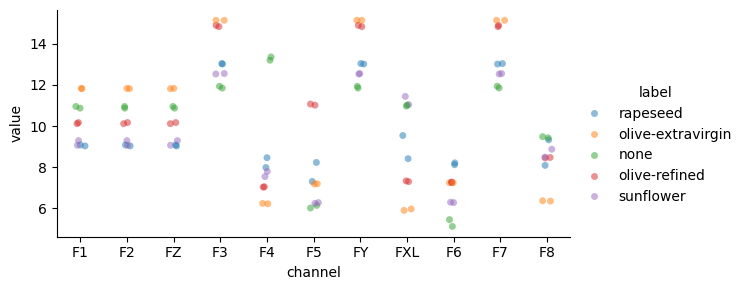

In [155]:
import seaborn
seaborn.catplot(data=tidy_log.reset_index(),
                x='channel',
                order=channel_order,
                hue='label',
                #row='excitation',
                y='value',
                alpha=0.5,
                aspect=2.0, height=3.0,
               )

In [143]:

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components=2)
d = data.copy()
label_column = 'label'
data_columns = list(set(d.columns) - set([label_column]))
data_columns = [ 'F6', 'F2' ]
X_train = data[data_columns]
Y_train = data[label_column]
lda.fit(X_train, Y_train)

lda.predict_proba(X_train)


array([[0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00],
       [0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00],
       [1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00],
       [0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 4.891e-43],
       [0.000e+00, 0.000e+00, 8.611e-42, 0.000e+00, 1.000e+00],
       [0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00],
       [0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00],
       [0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00],
       [0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00],
       [1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00]],
      dtype=float32)

In [144]:
m = d.copy().reset_index()
m = pandas.merge(m, pandas.DataFrame(lda.transform(X_train), columns=['lda_1', 'lda_2']), right_index=True, left_index=True)
m

,filename,FZ,FY,FXL,F2,F3,F4,F6,F1,F7,F8,F5,label,lda_1,lda_2
0,channels-6557.npy,525.0,8261.0,342.0,525.0,8260.0,254.0,297.0,525.0,8257.0,644.0,159.0,rapeseed,34.247234,-16.411186
1,channels-2216.npy,3609.0,35970.0,60.0,3607.0,35970.0,75.0,152.0,3608.0,35970.0,82.0,146.0,olive-extravirgin,-41.902843,-11.622769
2,channels-6536.npy,1870.0,3676.0,2011.0,1870.0,3677.0,9385.0,35.0,1871.0,3688.0,690.0,71.0,none,-15.300586,13.475598
3,channels-6615.npy,1111.0,29082.0,158.0,1111.0,29065.0,131.0,153.0,1112.0,29073.0,351.0,2069.0,olive-refined,10.209108,0.785506
4,channels-6655.npy,628.0,5995.0,2777.0,628.0,6000.0,222.0,79.0,628.0,5992.0,470.0,78.0,sunflower,14.201786,13.564800
5,channels-2165.npy,1153.0,30330.0,162.0,1153.0,30302.0,133.0,156.0,1152.0,30304.0,356.0,2149.0,olive-refined,9.579913,0.154720
6,channels-2140.npy,542.0,8393.0,746.0,542.0,8391.0,353.0,279.0,542.0,8391.0,273.0,301.0,rapeseed,32.415016,-13.978813
7,channels-6693.npy,3641.0,35970.0,63.0,3640.0,35970.0,76.0,152.0,3640.0,35970.0,83.0,147.0,olive-extravirgin,-42.590740,-11.788671
8,channels-2191.npy,537.0,5906.0,2110.0,537.0,5909.0,187.0,78.0,537.0,5903.0,360.0,76.0,sunflower,16.016603,14.162165
9,channels-234.npy,1983.0,3906.0,2072.0,1981.0,3908.0,10491.0,44.0,1981.0,3921.0,717.0,65.0,none,-16.875488,11.658649


<Axes: xlabel='lda_1', ylabel='lda_2'>

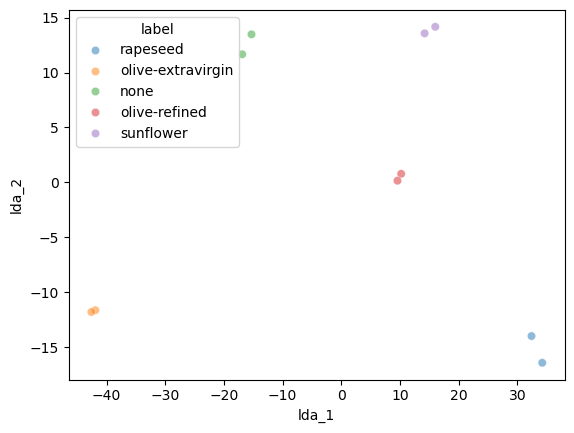

In [145]:
seaborn.scatterplot(m, x='lda_1', y='lda_2', hue='label', alpha=0.5)

In [146]:
loadings_df = pandas.DataFrame(
    lda.scalings_,
    index=data_columns,
    columns=[f'LD{i+1}' for i in range(lda.scalings_.shape[1])]
)
print(loadings_df)

         LD1       LD2
F6  0.082103 -0.139880
F2 -0.020845 -0.005027


In [147]:
np = numpy
pd = pandas
importance = np.abs(lda.scalings_).sum(axis=1)  # Sum across discriminants
feature_importance = pd.DataFrame({
    'feature': data_columns,
    'importance': importance
}).sort_values('importance', ascending=False)

print(feature_importance.head(10))

  feature  importance
0      F6    0.221982
1      F2    0.025873


In [154]:
#seaborn.pairplot(data, hue='label', vars=channel_order)
